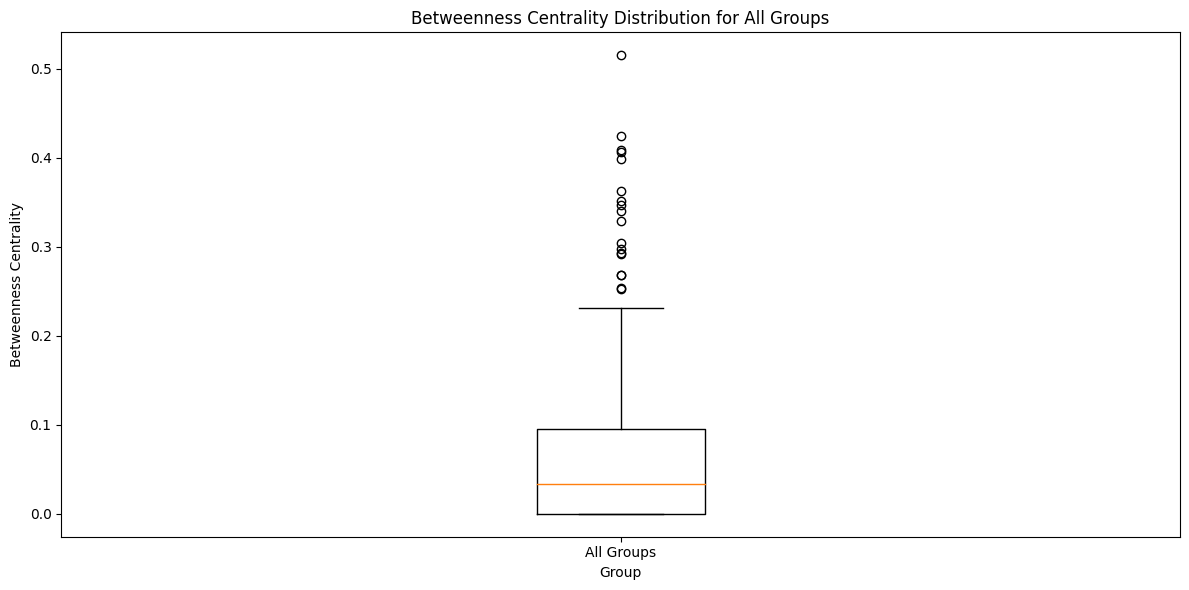

In [9]:
import os
import toml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from src import settings
from src.utils import fileio

TREATMENT = "LDA_5DIZ"

CONFIG_PATH = os.path.join(settings.CONFIG_DIR, "main.toml")
with open(CONFIG_PATH, "r") as file:
    config = toml.load(file)  

INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "1_2_create_total_graph", TREATMENT)
all_graphs = fileio.load_files_from_folder(INPUT_DIR, file_format=".gml")

res = {}
betweenness_data = [] 
for group_name, group_path in all_graphs.items():
    group_name = group_name.replace(".gml", "")
    g = nx.read_gml(group_path)
    
    m = nx.betweenness_centrality(g, weight="count")
    res[group_name] = list(m.values())  # Store the list of betweenness values
    betweenness_data.extend(res[group_name])  # Collect data for boxplots

# Create a single boxplot for all groups together
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.boxplot(betweenness_data, labels=['All Groups'])

# Label the axes and give the plot a title
plt.xlabel('Group')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality Distribution for All Groups')

# Show the plot
plt.tight_layout()  # Ensure the labels and title fit nicely
plt.show()